# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

#<font color='red'>1. Reading the csv file </font>

In [75]:
! wget wget --header="Host: doc-10-80-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,te;q=0.8" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_g91r08ja0v2lklj0jvdr2avi84sjt90s_nonce=qg87trun1rvai" --header="Connection: keep-alive" "https://doc-10-80-docs.googleusercontent.com/docs/securesc/k665ivmiqmum3nhh9vv4ettek14o699p/p9u6p58m731larmts62nc8gusjikkkcn/1594873425000/00484516897554883881/00484516897554883881/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&authuser=1&nonce=qg87trun1rvai&user=00484516897554883881&hash=v8vvaqtp7r373lb7ur9s21bv8fqid3dr" -c -O 'ratings_train.csv'

--2020-07-17 12:47:52--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-07-17 12:47:52--  https://doc-10-80-docs.googleusercontent.com/docs/securesc/k665ivmiqmum3nhh9vv4ettek14o699p/p9u6p58m731larmts62nc8gusjikkkcn/1594873425000/00484516897554883881/00484516897554883881/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&authuser=1&nonce=qg87trun1rvai&user=00484516897554883881&hash=v8vvaqtp7r373lb7ur9s21bv8fqid3dr
Resolving doc-10-80-docs.googleusercontent.com (doc-10-80-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-10-80-docs.googleusercontent.com (doc-10-80-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2020-07-17 12:47:52 ERROR 403: Forbidden.



In [76]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/AAIC/Assignments/Assignment_15/ratings_train.csv')
print(data.shape)
data.head()


(89992, 3)


,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<font color = "red"> 2. Making a weighted graph 

In [78]:

user = data.user_id.tolist()
item = data.item_id.tolist()
ratings = data.rating.tolist()
edge =[tuple((x[0],x[1])) for x in data.values.tolist()]
#wt = edges=[x[2] for x in data.values.tolist()]
B = nx.Graph()
B.add_nodes_from(data['item_id'].unique(), bipartite=0, label='item')
B.add_nodes_from(data['user_id'].unique(), bipartite=1, label='user')
B.add_edges_from(edge,  label='acted')

                      

#<font color= 'green'> Q. Please let me know how to check if my graph is weighted or not?
<font color='red'> --> any visualization technique would be helpful.

#<font color='red'>3. Create your adjacency matrix </font>

In [79]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((ratings,(user,item)))  # write your code of adjacency matrix here

In [80]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [81]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [82]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [83]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

<font color='red'>Compute mean of ratings</font>

In [84]:
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [85]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return sum(np.array(ratings))/(len(np.array(ratings)))

In [86]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [87]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [88]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 

    

    return np.zeros(dim)

In [89]:
dim= U.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [90]:
b_i.shape

(943,)

In [91]:
dim= VT.shape[1]# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)
c_j.shape

(1681,)

<font color='cyan'>Grader function -3 </font>

In [92]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [93]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    #print(U[user_id],V.T[item_id])
    #b_i=initialize(dim)
    #c_i=initialize(dim)
    db = 2*alpha*b_i[user_id] - 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    #print(db)
    return db

In [94]:
#dL/db_i = 2*alpha*b_i - 2 * (rating - mu - b_i - c_j - dot_prod(U,V))

<font color='cyan'>Grader function -4 </font>

In [95]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)

# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [96]:
VT.T[98].shape

(5,)

In [97]:
def derivative_dc(user_id,item_id,rating,U,V,mu):
    '''In this function, we will compute dL/dc_j'''
    #b_i=initialize(dim)
    #c_i=initialize(dim)
    dc = 2*alpha*c_j[item_id] - 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    #print(dc)
    return dc
    


<font color='cyan'>Grader function - 5 </font>

In [98]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [99]:
values = [ (x[0],x[1],x[2]) for x in data.values ]

In [100]:
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm
lr = 0.008
alpha = 0.001
epochs = 30
MSE = []

b_i=initialize(dim)
c_j=initialize(dim)
for each_epoch in (range(epochs)):
  y_hat_i_j = [] 
  for val in values:
        b_i[val[0]] = b_i[val[0]]- lr * derivative_db(val[0],val[1],val[2],U,VT,mu,alpha)
        c_j[val[1]] =  c_j[val[1]] - lr * derivative_dc(val[0],val[1],val[2],U,VT,mu)
        y_hat_i_j.append( mu + b_i[val[0]] + c_j[val[1]] + np.dot(U[val[0]],VT.T[val[1]]) )
        
  #print(np.round(mse(ratings,y_hat_i_j),2))    
  MSE.append(np.round(mse(ratings,y_hat_i_j),2))



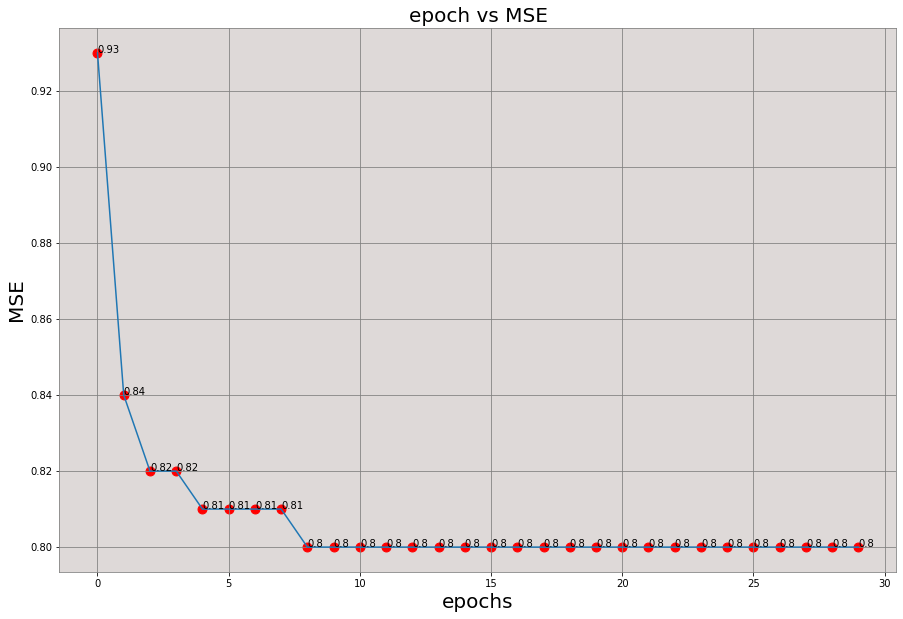

In [101]:

plt.figure(figsize = (15,10))
plt.rcParams['axes.facecolor'] = '#DED9D8'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "grey"
for i,j in zip(range(30),MSE):
    plt.annotate(str(j),xy=(i,j))
plt.plot(range(30),MSE)
plt.scatter(range(30),MSE, c= 'red', s = 80)
plt.title('epoch vs MSE', fontsize = 20)
plt.xlabel('epochs',fontsize = 20)
plt.ylabel('MSE', fontsize =20)
plt.show()

In [102]:
data_info  = pd.read_csv('/content/drive/My Drive/AAIC/Assignments/Assignment_15/user_info.csv.txt')
data_info

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5
...,...,...,...,...
938,938,26,0,939
939,939,32,1,940
940,940,20,1,941
941,941,48,0,942


<br>

#<font color='red'> Task 2: </font><font color = 'blue'> Checking if user matrix U is useful in predecting the gender of the user</font>

In [103]:
import numpy as np
age =[]
mean_ = sum(data_info['age'].values)/(len(data_info['age'].values))
sigma = np.std(data_info['age'].values)
for val in data_info['age'].values:
   age.append((val-mean_)/sigma)

In [105]:
new_data = pd.DataFrame(U)
new_data['m_or_f'] = data_info['is_male']
new_data.head()
new_data['age'] = age
new_data.head()

,0,1,2,3,4,m_or_f,age
0,0.066226,0.007889,-0.012532,-0.086198,0.024857,1,-0.824859
1,0.013644,-0.048895,0.056554,0.015809,-0.012032,0,1.554867
2,0.005438,-0.025128,0.020028,0.032817,0.035070,1,-0.906919
3,0.005704,-0.018211,0.010898,0.021854,0.013912,1,-0.824859
4,0.034122,0.009005,-0.044054,-0.016027,0.004320,0,-0.086324


In [106]:
def sigmoid(z):
  return 1/(1+np.e**(-z))
def derivative(x,w):
  sig = sigmoid(np.dot(w.T,x)) 
  return sig*(1-sig)

In [107]:
df_data = new_data.drop(['age','m_or_f'],axis=1)
df_data.head()

,0,1,2,3,4
0,0.066226,0.007889,-0.012532,-0.086198,0.024857
1,0.013644,-0.048895,0.056554,0.015809,-0.012032
2,0.005438,-0.025128,0.020028,0.032817,0.035070
3,0.005704,-0.018211,0.010898,0.021854,0.013912
4,0.034122,0.009005,-0.044054,-0.016027,0.004320


#<font color='red'>Applying simple logistic regression on the data</font>

In [108]:
from tqdm import tqdm
from sklearn.metrics import log_loss as LL

w = np.zeros(5)
lr= 0.001
LL_mf = []
for each_epoch in tqdm(range(30)):
  y_hat = []
  for val in df_data.values:
    w[0] = w[0] - lr*derivative(np.array(val),w)
    w[1] = w[1] - lr*derivative(np.array(val),w)
    w[2] = w[2] - lr*derivative(np.array(val),w)
    w[3] = w[3] - lr*derivative(np.array(val),w)
    w[4] = w[4] - lr*derivative(np.array(val),w)
    y_hat.append(sigmoid(np.dot(w.T,val)))
  LL_mf.append(LL(new_data['m_or_f'],y_hat))



100%|██████████| 30/30 [00:00<00:00, 37.18it/s]


In [109]:
for i in range(len(y_hat)):
  if y_hat[i] < 0.5:
    y_hat[i] = 0
  else:
    y_hat[i] = 1  


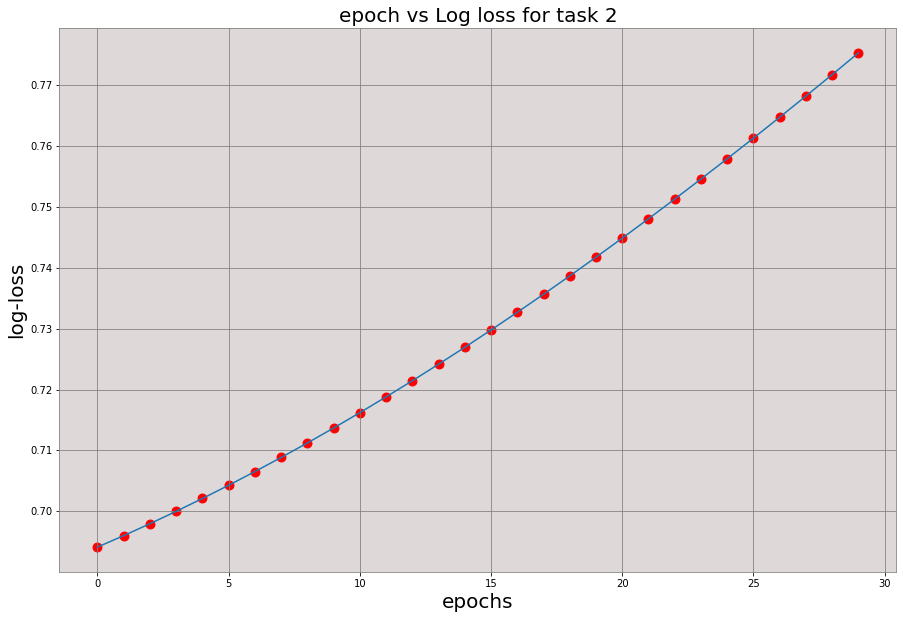

In [111]:

plt.figure(figsize = (15,10))
plt.rcParams['axes.facecolor'] = '#DED9D8'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "grey"
plt.plot(range(30),LL_mf)
plt.scatter(range(30),LL_mf, c= 'red', s = 80)
plt.title('epoch vs Log loss for task 2', fontsize = 20)
plt.xlabel('epochs',fontsize = 20)
plt.ylabel('log-loss', fontsize =20)
plt.show()

#<font color='red'>Conclusions:</font> <font color='blue'>As we can see by using the user matrix data as feature to predict the gender of the user is not a good idea. We need more features to predict that. As we are getting accuracy of <font color='red'>43</font> percent and AUC score as around <font color='red'>50</font> %. </font>

# Verifying the result with sklearn logistic regression
<font color='blue'>Just making the regularization value to <font color='red'>C = 1000</font> we have accuracy of about <font color='red'>75%</font> which is more than the self implemented Logistic Regression</font>

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR = LogisticRegression(C=1000)
x_tr,x_test,y_tr,y_test=train_test_split(df_data,new_data['m_or_f'],test_size=0.25,random_state=15)
LR.fit(x_tr,y_tr)
y_lr = LR.predict(x_test)

In [113]:
acc_lr = accuracy_score(y_test,y_lr)
acc_lr

0.75

# Plotting confusion matrix for task 2

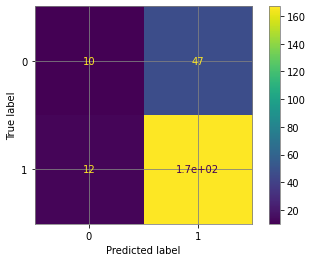

In [114]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( LR,x_test,y_test)
plt.show()

# <font color ='red'>Interpretation: </font><font color= 'blue'> From the confusion matrix plotted we can see that in predicting male user the model is performing reasonably well but the concern is in predicting if the user is female. We can see that the model is predicting <font color='red'>82 % wrong</font> for females and <font color = 'red'>93% correct</font>  for males.</font>

<font color='red'>_______________________the end______________________</font>